Task 1: A classification example: fetal heart condition diagnosis

Step1

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
  
# Read the CSV file.
data = pd.read_csv("/Users/laqfire/code/AML/lab1/CTG.csv", skiprows=1)

# Select the relevant numerical columns.
selected_cols = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
                 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
                 'Median', 'Variance', 'Tendency', 'NSP']
data = data[selected_cols].dropna()

# Shuffle the dataset.
data_shuffled = data.sample(frac=1.0, random_state=0)

# Split into input part X and output part Y.
X = data_shuffled.drop('NSP', axis=1)

# Map the diagnosis code to a human-readable label.
def to_label(y):
    return [None, 'normal', 'suspect', 'pathologic'][(int(y))]

Y = data_shuffled['NSP'].apply(to_label)

# Partition the data into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

In [13]:
X.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
658,130.0,1.0,0.0,3.0,0.0,0.0,0.0,24.0,1.2,12.0,...,35.0,120.0,155.0,1.0,0.0,134.0,133.0,135.0,1.0,0.0
1734,134.0,9.0,1.0,8.0,5.0,0.0,0.0,59.0,1.2,0.0,...,109.0,80.0,189.0,6.0,0.0,150.0,146.0,150.0,33.0,0.0
1226,125.0,1.0,0.0,4.0,0.0,0.0,0.0,43.0,0.7,31.0,...,21.0,120.0,141.0,0.0,0.0,131.0,130.0,132.0,1.0,0.0
1808,143.0,0.0,0.0,1.0,0.0,0.0,0.0,69.0,0.3,6.0,...,27.0,132.0,159.0,1.0,0.0,145.0,144.0,146.0,1.0,0.0
825,152.0,0.0,0.0,4.0,0.0,0.0,0.0,62.0,0.4,59.0,...,25.0,136.0,161.0,0.0,0.0,159.0,156.0,158.0,1.0,1.0


Step2

In [14]:

from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy='most_frequent')
from sklearn.model_selection import cross_val_score

import numpy as np
scores = cross_val_score(clf, Xtrain, Ytrain)
print("Scores:", scores)
print("Mean score:", np.mean(scores))

Scores: [0.78235294 0.78235294 0.77941176 0.77941176 0.77941176]
Mean score: 0.7805882352941176


Step3

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier


# create dictionary of classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Perceptron': Perceptron(),
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Linear SVC': LinearSVC(),
    'Neural Network': MLPClassifier(random_state=0, max_iter=2000)
}


# compute the cross-validation accuuracy
# 5-fold instead of 3-fold cross-validation
# Accuracy as evaluation metric
for name, clf in classifiers.items():
    score = cross_val_score(clf, Xtrain, Ytrain, cv=5, scoring='accuracy').mean()
    print(f'{name}: {score}')

Decision Tree: 0.9217647058823528
Random Forest: 0.9388235294117647
Gradient Boosting: 0.9488235294117647
Perceptron: 0.825294117647059


/Users/laqfire/code/sklearn-env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/laqfire/code/sklearn-env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

Logistic Regression: 0.8988235294117647
Linear SVC: 0.8952941176470588
Neural Network: 0.8847058823529412


Step4
As we can see above, Gradient Boosting has the highest accuary.

In [35]:
from sklearn.metrics import accuracy_score
  
gbc = GradientBoostingClassifier()
gbc.fit(Xtrain, Ytrain)
Yguess = gbc.predict(Xtest)
print(f"Accuracy: {accuracy_score(Ytest, Yguess)}")


Accuracy: 0.9295774647887324


Task 2: Decision trees for classification

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
clf = DecisionTreeClassifier(max_depth = 1)
clf.fit(Xtrain, Ytrain);
from sklearn.model_selection import cross_val_score

cross_val_score(clf, Xtrain, Ytrain, cv=5).mean()

np.float64(0.8164705882352941)

In [43]:
class DecisionTreeLeaf:

    def __init__(self, value):
            self.value = value
    
       # This method computes the prediction for this leaf node. This will just return a constant value.\n",
    def predict(self, x):
           return self.value
    
        # Utility function to draw a tree visually using graphviz.\n",
    def draw_tree(self, graph, node_counter, names):
           node_id = str(node_counter)
           val_str = f'{self.value:.4g}' if isinstance(self.value, float) else str(self.value)
           graph.node(node_id, val_str, style='filled')
           return node_counter+1, node_id

    def __eq__(self, other):
        if isinstance(other, DecisionTreeLeaf):
               return self.value == other.value
        else:
               return False
        
    def to_str(self, indent, lines, names):
           val_str = f'{self.value:.4g}' if isinstance(self.value, float) else str(self.value)
           lines.append(' '*indent + val_str)

In [44]:
class DecisionTreeBranch:
    
        def __init__(self, feature, threshold, low_subtree, high_subtree):
            self.feature = feature
            self.threshold = threshold
            self.low_subtree = low_subtree
            self.high_subtree = high_subtree
    
        # For a branch node, we compute the prediction by first considering the feature, and then \n",
        # calling the upper or lower subtree, depending on whether the feature is or isn't greater\n",
        # than the threshold.\n",
        def predict(self, x):
            if x[self.feature] <= self.threshold:
                return self.low_subtree.predict(x)
            else:
                return self.high_subtree.predict(x)
    
        # Utility function to draw a tree visually using graphviz.\n",
        def draw_tree(self, graph, node_counter, names):
            node_counter, low_id = self.low_subtree.draw_tree(graph, node_counter, names)
            node_counter, high_id = self.high_subtree.draw_tree(graph, node_counter, names)
            node_id = str(node_counter)
            fname = f'F{self.feature}' if names is None else names[self.feature]
            lbl = f'{fname} > {self.threshold:.4g}?'
            graph.node(node_id, lbl, shape='box', fillcolor='yellow', style='filled, rounded')
            graph.edge(node_id, low_id, 'False')
            graph.edge(node_id, high_id, 'True')
            return node_counter+1, node_id
            
        def to_str(self, indent, lines, names):
            pad = ' '*indent
            fname = f'F{self.feature}' if names is None else names[self.feature]
            lines.append(pad + f'{fname} <= {self.threshold:.3g}?')
            lines.append(pad + '  True =>')
            self.low_subtree.to_str(indent+4, lines, names)
            lines.append(pad + '  False =>')
            self.high_subtree.to_str(indent+4, lines, names)
            

In [48]:
from graphviz import Digraph
from sklearn.base import BaseEstimator, ClassifierMixin
from abc import ABC, abstractmethod
    
class DecisionTree(ABC, BaseEstimator):
    
        def __init__(self, max_depth):
            super().__init__()
            self.max_depth = max_depth
            
        # As usual in scikit-learn, the training method is called *fit*. We first process the dataset so that\n",
        # we're sure that it's represented as a NumPy matrix. Then we call the recursive tree-building method\n",
        # called make_tree (see below).\n",
        def fit(self, X, Y):
            if isinstance(X, pd.DataFrame):
                self.names = X.columns
                X = X.to_numpy()
            elif isinstance(X, list):
                self.names = None
                X = np.array(X)
            else:
                self.names = None
            Y = np.array(Y)        
            self.root = self.make_tree(X, Y, self.max_depth)
            
        def draw_tree(self):
            graph = Digraph()
            self.root.draw_tree(graph, 0, self.names)
            return graph
    
        # By scikit-learn convention, the method *predict* computes the classification or regression output\n",
        # for a set of instances.\n",
        # To implement it, we call a separate method that carries out the prediction for one instance.\n",
        def predict(self, X):
            if isinstance(X, pd.DataFrame):
                X = X.to_numpy()
            return [self.predict_one(x) for x in X]
    
        # Predicting the output for one instance.\n",
        def predict_one(self, x):
            return self.root.predict(x)       
    
        # This is the recursive training \n",
        def make_tree(self, X, Y, max_depth):
    
            # We start by computing the default value that will be used if we'll return a leaf node.\n",
            # For classifiers, this will be the most common value in Y.\n",
            default_value = self.get_default_value(Y)
    
            # First the two base cases in the recursion: is the training set completely\n",
            # homogeneous, or have we reached the maximum depth? Then we need to return a leaf.\n",
    
            # If we have reached the maximum depth, return a leaf with the majority value.\n",
            if max_depth == 0:
                return DecisionTreeLeaf(default_value)
    
            # If all the instances in the remaining training set have the same output value,\n",
            # return a leaf with this value.\n",
            if self.is_homogeneous(Y):
                return DecisionTreeLeaf(default_value)

            # Select the \"most useful\" feature and split threshold. To rank the \"usefulness\" of features,\n",
            # we use one of the classification or regression criteria.\n",
            # For each feature, we call best_split (defined in a subclass). We then maximize over the features.\n",
            n_features = X.shape[1]
            
            _, best_feature, best_threshold = max(self.best_split(X, Y, feature) 
                    for feature in range(n_features))
            
            if best_feature is None:
                return DecisionTreeLeaf(default_value)
    
            # Split the training set into subgroups, based on whether the selected feature is greater than\n",
            # the threshold or not\n",
            X_low, X_high, Y_low, Y_high = self.split_by_feature(X, Y, best_feature, best_threshold)
    
            # Build the subtrees using a recursive call. Each subtree is associated\n",
            # with a value of the feature.\n",
            low_subtree = self.make_tree(X_low, Y_low, max_depth-1)
            high_subtree = self.make_tree(X_high, Y_high, max_depth-1)
    
            if low_subtree == high_subtree:
                return low_subtree
    
            # Return a decision tree branch containing the result.\n",
            return DecisionTreeBranch(best_feature, best_threshold, low_subtree, high_subtree)
        
        # Utility method that splits the data into the \"upper\" and \"lower\" part, based on a feature\n",
        # and a threshold.\n",
        def split_by_feature(self, X, Y, feature, threshold):
            low = X[:,feature] <= threshold
            high = ~low
            return X[low], X[high], Y[low], Y[high]
        
        def __str__(self):
            lines = []
            self.root.to_str(0, lines, self.names)
            return '\\n'.join(lines)
        
        # The following three methods need to be implemented by the classification and regression subclasses.\n",
        
        @abstractmethod
        def get_default_value(self, Y):
            pass
    
        @abstractmethod
        def is_homogeneous(self, Y):
            pass
    
        @abstractmethod
        def best_split(self, X, Y, feature):
            pass

In [49]:
from collections import Counter

class TreeClassifier(DecisionTree, ClassifierMixin):

    def __init__(self, max_depth=10, criterion='maj_sum'):
        super().__init__(max_depth)
        self.criterion = criterion
        
    def fit(self, X, Y):
        # For decision tree classifiers, there are some different ways to measure
        # the homogeneity of subsets.
        if self.criterion == 'maj_sum':
            self.criterion_function = majority_sum_scorer
        elif self.criterion == 'info_gain':
            self.criterion_function = info_gain_scorer
        elif self.criterion == 'gini':
            self.criterion_function = gini_scorer
        else:
            raise Exception(f'Unknown criterion: {self.criterion}')
        super().fit(X, Y)
        self.classes_ = sorted(set(Y))

    # Select a default value that is going to be used if we decide to make a leaf.
    # We will select the most common value.
    def get_default_value(self, Y):
        self.class_distribution = Counter(Y)
        return self.class_distribution.most_common(1)[0][0]
    
    # Checks whether a set of output values is homogeneous. In the classification case, 
    # this means that all output values are identical.
    # We assume that we called get_default_value just before, so that we can access
    # the class_distribution attribute. If the class distribution contains just one item,
    # this means that the set is homogeneous.
    def is_homogeneous(self, Y):
        return len(self.class_distribution) == 1
        
    # Finds the best splitting point for a given feature. We'll keep frequency tables (Counters)
    # for the upper and lower parts, and then compute the impurity criterion using these tables.
    # In the end, we return a triple consisting of
    # - the best score we found, according to the criterion we're using
    # - the id of the feature
    # - the threshold for the best split
    def best_split(self, X, Y, feature):

        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        sorted_indices = np.argsort(X[:, feature])        
        X_sorted = list(X[sorted_indices, feature])
        Y_sorted = list(Y[sorted_indices])

        n = len(Y)

        # The frequency tables corresponding to the parts *before and including*
        # and *after* the current element.
        low_distr = Counter()
        high_distr = Counter(Y)

        # Keep track of the best result we've seen so far.
        max_score = -np.inf
        max_i = None

        # Go through all the positions (excluding the last position).
        for i in range(0, n-1):

            # Input and output at the current position.
            x_i = X_sorted[i]
            y_i = Y_sorted[i]
            
            # Update the frequency tables.
            low_distr[y_i] += 1
            high_distr[y_i] -= 1

            # If the input is equal to the input at the next position, we will
            # not consider a split here.
            #x_next = XY[i+1][0]
            x_next = X_sorted[i+1]
            if x_i == x_next:
                continue

            # Compute the homogeneity criterion for a split at this position.
            score = self.criterion_function(i+1, low_distr, n-i-1, high_distr)

            # If this is the best split, remember it.
            if score > max_score:
                max_score = score
                max_i = i

        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return -np.inf, None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(X_sorted[max_i] + X_sorted[max_i+1])
        return max_score, feature, split_point

In [50]:
def majority_sum_scorer(n_low, low_distr, n_high, high_distr):
    maj_sum_low = low_distr.most_common(1)[0][1]
    maj_sum_high = high_distr.most_common(1)[0][1]
    return maj_sum_low + maj_sum_high
    
def entropy(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return -sum(p*np.log2(p) if p > 0 else 0 for p in ps)

def info_gain_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*entropy(low_distr)+n_high*entropy(high_distr))/(n_low+n_high)

def gini_impurity(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return 1-sum(p**2 for p in ps)
    
def gini_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*gini_impurity(low_distr)+n_high*gini_impurity(high_distr))/(n_low+n_high)


In [ ]:
# try different max_depth value
depths = range(1, 30)
scores = []

for depth in depths:
   clf = TreeClassifier(max_depth=depth)
   score = cross_val_score(clf, Xtrain, Ytrain, cv=5).mean()
   scores.append(score)

# find the best
best_depth = depths[np.argmax(scores)]

# evaluate the classifier
best_clf = TreeClassifier(max_depth=best_depth)
best_clf.fit(Xtrain, Ytrain)
test_score = best_clf.score(Xtest, Ytest)

print(f'Best depth: {best_depth}')
print(f'Test accuracy: {test_score}')

Best depth: 13
Test accuracy: 0.873


draw a tree for illustration

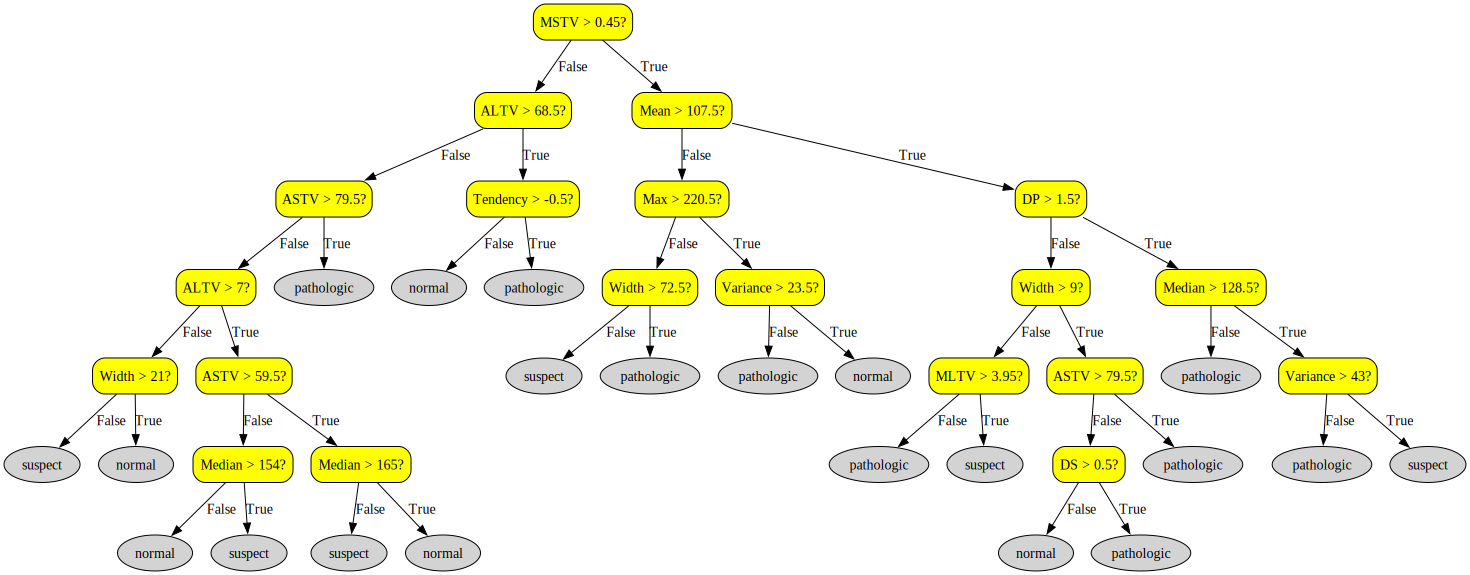

In [56]:
cls = TreeClassifier(max_depth=6)
cls.fit(Xtrain, Ytrain)
cls.draw_tree()

## Task 3: A regression example: predicting apartment prices

#### Step 1: Data Munging

Read the `sberbank.csv` file, select specific columns, shuffle the data, seperate input matrix `X` and ouput vector `y`, and then do the test-training split. 

The following code is quoted from [the instructions](https://www.cse.chalmers.se/~richajo/dit866/assignments/a1/assignment1.html).

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Read the CSV file using Pandas.
alldata = pd.read_csv("sberbank.csv")

# Convert the timestamp string to an integer representing the year.
def get_year(timestamp):
    return int(timestamp[:4])
alldata['year'] = alldata.timestamp.apply(get_year)

# Select the 7 input columns and the output column.
selected_columns = ['price_doc', 'year', 'full_sq', 'life_sq', 'floor', 'num_room', 'kitch_sq', 'full_all']
alldata = alldata[selected_columns]
alldata = alldata.dropna()

# Shuffle.
alldata_shuffled = alldata.sample(frac=1.0, random_state=0)

# Separate the input and output columns.
X = alldata_shuffled.drop('price_doc', axis=1)
# For the output, we'll use the log of the sales price.
Y = alldata_shuffled['price_doc'].apply(np.log)

# Split into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

#### Step 2: Train and evaluate different regression models

First, we perform cross validtion on the training set for all the regressors, and select the model with highest score to train on the whole training set and evaluate on the held-out test set.

The models used are shown in the code.

In [21]:

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

models = {
    "DummyRegressor": DummyRegressor(),
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(alpha=1.0, max_iter=1000, tol=0.0001, random_state=114514),
    "Ridge": Ridge(
            alpha=1.0, fit_intercept=True, solver='auto', 
            max_iter=None, tol=0.001, random_state=42
        ),
    "RandomForestRegressor": RandomForestRegressor(
            n_estimators=100, 
            max_depth=None, min_samples_split=2, min_samples_leaf=1, 
            random_state=42, max_features= 1 / 3
        ),
    "GradientBoostingRegressor": GradientBoostingRegressor(
            n_estimators=100, learning_rate=0.1, max_depth=3, 
            min_samples_split=2, min_samples_leaf=1, random_state=42
        ),
    "DecisionTreeRegressor": DecisionTreeRegressor(
            max_depth=None, min_samples_split=2, 
            min_samples_leaf=1, random_state=42, ccp_alpha=0.01
        ),
    "MLPRegressor": MLPRegressor(
            random_state=198 
        ),
}

#Preform cross validation for all models on the training set
#Print their scores
for name, regr_model in models.items():
    score = cross_val_score(regr_model, Xtrain, Ytrain, scoring="neg_mean_squared_error").mean()
    print(f"Model: {name}; Score: {score}")
    

Model: DummyRegressor; Score: -0.38925247260237555
Model: LinearRegression; Score: -0.3013986588767197
Model: Lasso; Score: -0.30104706717488716
Model: Ridge; Score: -0.3013978423217976
Model: RandomForestRegressor; Score: -0.2799493127951545
Model: GradientBoostingRegressor; Score: -0.2645272118267596
Model: DecisionTreeRegressor; Score: -0.3115473038894633
Model: MLPRegressor; Score: -300.40805113088584


Clearly, `GradientBoostingRegressor` achieved highest score in cross validation.

Finally, train it on the full training set and evaluate on the held-out test set:

In [22]:
regr_model = models["GradientBoostingRegressor"]
regr_model.fit(Xtrain, Ytrain)
mse = mean_squared_error(Ytest, regr_model.predict(Xtest))
print(f"Model: {name}; MSE: {mse}")

Model: MLPRegressor; MSE: 0.2713747983891565
